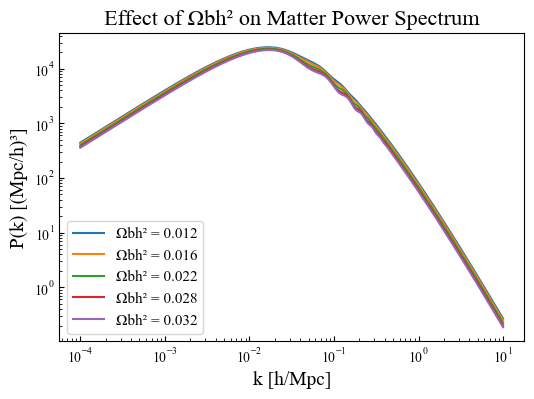

In [1]:
import camb
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['mathtext.fontset'] = 'stix' 

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

# Set fiducial parameters
pars = camb.set_params(H0=67.5, ombh2=0.022, omch2=0.122, 
                       As=2e-9, ns=0.965)
pars.set_matter_power(redshifts=[0], kmax=10.0)

# Calculate power spectrum for different Ωbh² values
ombh2_values = [0.012, 0.016, 0.022, 0.028, 0.032]
plt.figure(figsize=(6, 4))

for ombh2 in ombh2_values:
    pars.ombh2 = ombh2
    results = camb.get_results(pars)
    kh, z, pk = results.get_matter_power_spectrum(
        minkh=1e-4, maxkh=10, npoints=200)
    plt.loglog(kh, pk[0, :], label=f'Ωbh² = {ombh2}')

plt.xlabel('k [h/Mpc]', fontsize=14)
plt.ylabel('P(k) [(Mpc/h)³]', fontsize=14)
plt.title('Effect of Ωbh² on Matter Power Spectrum', fontsize=16)
plt.legend(fontsize=11)
plt.show()

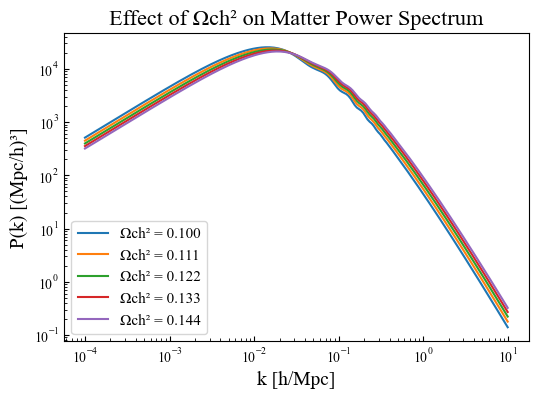

In [2]:
import camb
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['mathtext.fontset'] = 'stix' 

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

# Set fiducial parameters
pars = camb.set_params(H0=67.5, ombh2=0.022, omch2=0.122, 
                       As=2e-9, ns=0.965)
pars.set_matter_power(redshifts=[0], kmax=10.0)

# Calculate power spectrum for different Ωch² values
omch2_values = [0.100, 0.111, 0.122, 0.133, 0.144]
plt.figure(figsize=(6, 4))

for omch2 in omch2_values:
    pars.omch2 = omch2
    results = camb.get_results(pars)
    kh, z, pk = results.get_matter_power_spectrum(
        minkh=1e-4, maxkh=10, npoints=200)
    plt.loglog(kh, pk[0, :], label=f'Ωch² = {omch2:.3f}')

plt.xlabel('k [h/Mpc]', fontsize=14)
plt.ylabel('P(k) [(Mpc/h)³]', fontsize=14)
plt.title('Effect of Ωch² on Matter Power Spectrum', fontsize=16)
plt.legend(fontsize=11)
plt.show()

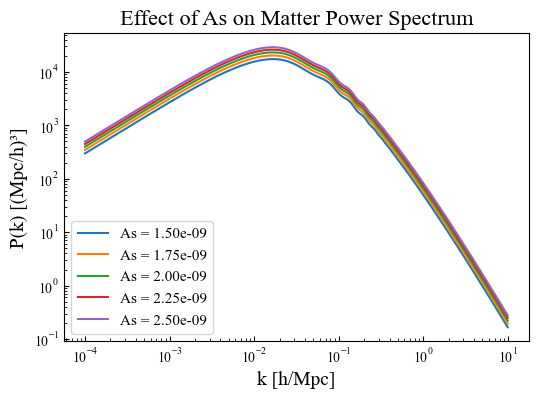

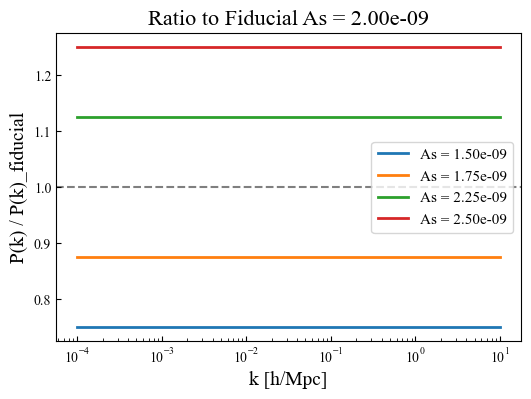

In [3]:
import camb
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['mathtext.fontset'] = 'stix' 

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

# Set fiducial parameters
As_values = [1.5e-9, 1.75e-9, 2e-9, 2.25e-9, 2.5e-9]

# Figure 1: Log scale plot
plt.figure(figsize=(6, 4))

for i, As in enumerate(As_values):
    pars = camb.set_params(H0=67.5, ombh2=0.022, omch2=0.122, 
                           As=As, ns=0.965)
    pars.set_matter_power(redshifts=[0], kmax=10.0)
    results = camb.get_results(pars)
    kh, z, pk = results.get_matter_power_spectrum(
        minkh=1e-4, maxkh=10, npoints=200)
    
    plt.loglog(kh, pk[0, :],
               label=f'As = {As:.2e}')

plt.xlabel('k [h/Mpc]', fontsize=14)
plt.ylabel('P(k) [(Mpc/h)³]', fontsize=14)
plt.title('Effect of As on Matter Power Spectrum', fontsize=16)
plt.legend(fontsize=11)
plt.show()

# Figure 2: Ratio to fiducial value (As = 2e-9)
plt.figure(figsize=(6, 4))

As_fiducial = 2e-9
pars_fid = camb.set_params(H0=67.5, ombh2=0.022, omch2=0.122, 
                           As=As_fiducial, ns=0.965)
pars_fid.set_matter_power(redshifts=[0], kmax=10.0)
results_fid = camb.get_results(pars_fid)
kh_fid, z_fid, pk_fid = results_fid.get_matter_power_spectrum(
    minkh=1e-4, maxkh=10, npoints=200)

for i, As in enumerate(As_values):
    if As == As_fiducial:  # Skip fiducial value
        continue
        
    pars = camb.set_params(H0=67.5, ombh2=0.022, omch2=0.122, 
                           As=As, ns=0.965)
    pars.set_matter_power(redshifts=[0], kmax=10.0)
    results = camb.get_results(pars)
    kh, z, pk = results.get_matter_power_spectrum(
        minkh=1e-4, maxkh=10, npoints=200)
    
    ratio = pk[0, :] / pk_fid[0, :]
    plt.semilogx(kh, ratio, linewidth=2, 
                 label=f'As = {As:.2e}')

plt.axhline(y=1, color='black', linestyle='--', alpha=0.5)
plt.xlabel('k [h/Mpc]', fontsize=14)
plt.ylabel('P(k) / P(k)_fiducial', fontsize=14)
plt.title('Ratio to Fiducial As = 2.00e-09', fontsize=16)
plt.legend(fontsize=11)
plt.show()